In [1]:
import pandas as pd

# Load the DataFrame from the CSV file
df = pd.read_csv('Data/output/df_cleaned.csv')



In [2]:
# Display the first few rows of the DataFrame to verify it loaded correctly
df.sample(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_year_avg,company_name,job_skills,job_type_skills,num_jobs
497276,Business Analyst,Shopper Insights Client Associate,"Medellín, Medellin, Antioquia, Colombia",via Trabajo.org,Full-time,False,Colombia,2023-01-31 12:30:23,True,False,Colombia,NaN,dunnhumby,Not specified,Not specified,1
404469,Software Engineer,Senior DevOps Engineer,"Helsinki, Finland",via Trabajo.org,Full-time,False,Finland,2023-04-16 18:45:00,True,False,Finland,NaN,Smartly.io Inc.,"['mongodb', 'mongodb', 'python', 'ruby', 'ruby...","{'cloud': ['aws', 'gcp'], 'databases': ['mongo...",1
264413,Data Scientist,Senior Data Scientist,"Johannesburg, South Africa",via Pnet,Full-time,False,South Africa,2023-11-30 07:15:47,False,False,South Africa,NaN,Network Finance,"['python', 'r']","{'programming': ['python', 'r']}",1


In [3]:
df.job_title_short.unique()

array(['Data Engineer', 'Data Analyst', 'Business Analyst',
       'Data Scientist', 'Machine Learning Engineer', 'Cloud Engineer',
       'Software Engineer'], dtype=object)

In [19]:

# Convert job_posted_date to datetime format
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Extract year and month
df['year_month'] = df['job_posted_date'].dt.to_period('M')

# Group by relevant columns and count occurrences
grouped_df = df.groupby([
    'job_title_short', 'job_country', 'job_via', 'job_work_from_home', 'year_month'
]).size().reset_index(name='num_jobs')

# Display the grouped DataFrame
grouped_df.sample(2)


,job_title_short,job_country,job_via,job_work_from_home,year_month,num_jobs
36916,Data Engineer,Bahamas,via KSNT Jobs,False,2023-06,5
90247,Software Engineer,Portugal,via Jobtome,False,2023-02,1


In [13]:
grouped_df.shape

(93493, 6)

In [12]:
# Create a pivot table for time series forecasting
pivot_df = grouped_df.pivot_table(
    index='year_month',
    columns=['job_title_short', 'job_country', 'job_via'],
    values='num_jobs',
    fill_value=0
)

# Display the pivoted DataFrame
print(pivot_df.head())


job_title_short         Business Analyst                                      \
job_country                  Afghanistan                                       
job_via         via LinkedIn Afghanistan via UN Joblink Careers via UNjobnet   
year_month                                                                     
2023-01                              0.0                    1.0          1.0   
2023-02                              0.0                    0.0          0.0   
2023-03                              0.0                    0.0          0.0   
2023-04                              0.0                    0.0          0.0   
2023-05                              0.0                    0.0          0.0   

job_title_short                                                   \
job_country                         Albania                        
job_via         via AUTO1 Group - Talentify via Autohero Careers   
year_month                                                         
2023-01

In [20]:
pivot_df

job_title_short         Business Analyst                                      \
job_country                  Afghanistan                                       
job_via         via LinkedIn Afghanistan via UN Joblink Careers via UNjobnet   
year_month                                                                     
2023-01                              0.0                    1.0          1.0   
2023-02                              0.0                    0.0          0.0   
2023-03                              0.0                    0.0          0.0   
2023-04                              0.0                    0.0          0.0   
2023-05                              0.0                    0.0          0.0   
2023-06                              0.0                    0.0          0.0   
2023-07                              1.0                    0.0          0.0   
2023-08                              0.0                    0.0          0.0   
2023-09                              0.0                    0.0          0.0   
2023-10                              1.0                    0.0          0.0   
2023-11                              0.0                    0.0          0.0   
2023-12                              0.0                    0.0          0.0   

job_title_short                                                   \
job_country                         Albania                        
job_via         via AUTO1 Group - Talentify via Autohero Careers   
year_month                                                         
2023-01                                 0.0                  0.0   
2023-02                                 0.0                  0.0   
2023-03                                 0.0                  0.0   
2023-04                                 0.0                  0.0   
2023-05                                 0.0                  0.0   
2023-06                                 0.0                  0.0   
2023-07                                 0.0                  0.0   
2023-08                                 1.0                  0.0   
2023-09                                 0.0                  0.0   
2023-10                                 0.0                  0.0   
2023-11                                 0.0                  1.0   
2023-12                                 0.0                  0.0   

job_title_short                                                         \
job_country                                                              
job_via         via Jobs At Vodafone via LinkedIn via LinkedIn Albania   
year_month                                                               
2023-01                          0.0          0.0                  0.0   
2023-02                          0.0          1.0                  1.0   
2023-03                          0.0          0.0                  1.0   
2023-04                          0.0          0.0                  0.0   
2023-05                          0.0          0.0                  0.0   
2023-06                          0.0          0.0                  1.0   
2023-07                          0.0          0.0                  0.0   
2023-08                          0.0          0.0                  1.0   
2023-09                          0.0          0.0                  1.0   
2023-10                          0.0          0.0                  0.0   
2023-11                          0.0          0.0                  1.0   
2023-12                          1.0          0.0                  0.0   

job_title_short                                 ...  Software Engineer  \
job_country          Algeria                    ...              Yemen   
job_via         via Bayt.com via BeBee الجزائر  ... via LinkedIn اليمن   
year_month                                      ...                      
2023-01                  1.0               2.0  ...                1.0   
2023-02                  0.0               0.0  ...                0.0   
2

In [ ]:
pivot_df.T

year_month                                                 2023-01  2023-02  \
job_title_short   job_country job_via                                         
Business Analyst  Afghanistan via LinkedIn Afghanistan         0.0      0.0   
                              via UN Joblink Careers           1.0      0.0   
                              via UNjobnet                     1.0      0.0   
                  Albania     via AUTO1 Group - Talentify      0.0      0.0   
                              via Autohero Careers             0.0      0.0   
...                                                            ...      ...   
Software Engineer Zimbabwe    via Jobgether                    0.0      0.0   
                              via Jobs In Zimbabwe             0.0      0.0   
                              via Vacancy Mail                 0.0      0.0   
                              via Zim NGO Jobs                 1.0      0.0   
                              via Zimbajob.com                 0.0      0.0   

year_month                                                 2023-03  2023-04  \
job_title_short   job_country job_via                                         
Business Analyst  Afghanistan via LinkedIn Afghanistan         0.0      0.0   
                              via UN Joblink Careers           0.0      0.0   
                              via UNjobnet                     0.0      0.0   
                  Albania     via AUTO1 Group - Talentify      0.0      0.0   
                              via Autohero Careers             0.0      0.0   
...                                                            ...      ...   
Software Engineer Zimbabwe    via Jobgether                    0.0      0.0   
                              via Jobs In Zimbabwe             0.0      1.0   
                              via Vacancy Mail                 0.0      0.0   
                              via Zim NGO Jobs                 0.0      0.0   
                              via Zimbajob.com                 0.0      0.0   

year_month                                                 2023-05  2023-06  \
job_title_short   job_country job_via                                         
Business Analyst  Afghanistan via LinkedIn Afghanistan         0.0      0.0   
                              via UN Joblink Careers           0.0      0.0   
                              via UNjobnet                     0.0      0.0   
                  Albania     via AUTO1 Group - Talentify      0.0      0.0   
                              via Autohero Careers             0.0      0.0   
...                                                            ...      ...   
Software Engineer Zimbabwe    via Jobgether                    0.0      0.0   
                              via Jobs In Zimbabwe             0.0      0.0   
                              via Vacancy Mail                 1.0      0.0   
                              via Zim NGO Jobs                 0.0      0.0   
                              via Zimbajob.com                 0.0      0.0   

year_month                                                 2023-07  2023-08  \
job_title_short   job_country job_via                                         
Business Analyst  Afghanistan via LinkedIn Afghanistan         1.0      0.0   
                              via UN Joblink Careers           0.0      0.0   
                              via UNjobnet                     0.0      0.0   
                  Albania     via AUTO1 Group - Talentify      0.0      1.0   
                              via Autohero Careers             0.0      0.0   
...                                                            ...      ...   
Software Engineer Zimbabwe    via Jobgether                    1.0      0.0   
                              via Jobs In Zimbabwe             0.0      0.0   
                              via Vacancy Mail                 0.0      0.0   
                              via Zim NGO Jobs 

In [21]:
import pandas as pd

# Assuming pivot_df has columns with job titles and a 'year_month' index
# Flatten the columns if multi-indexed (optional based on your pivot table structure)
pivot_df.columns = ['_'.join(col).strip() for col in pivot_df.columns.values]

# Sum all job postings per month
monthly_totals = pivot_df.sum(axis=1).reset_index()

# Rename columns for Prophet
monthly_totals.columns = ['ds', 'y']

# Display the first few rows
print(monthly_totals.head())


        ds        y
0  2023-01  72674.5
1  2023-02  51726.5
2  2023-03  50072.5
3  2023-04  50974.0
4  2023-05  40892.0


In [22]:
print(monthly_totals.dtypes)

ds    period[M]
y       float64
dtype: object


d:\Ironhack\Git\Final project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
18:40:32 - cmdstanpy - INFO - Chain [1] start processing
18:40:33 - cmdstanpy - INFO - Chain [1] done processing
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the o

<Figure size 1000x600 with 0 Axes>

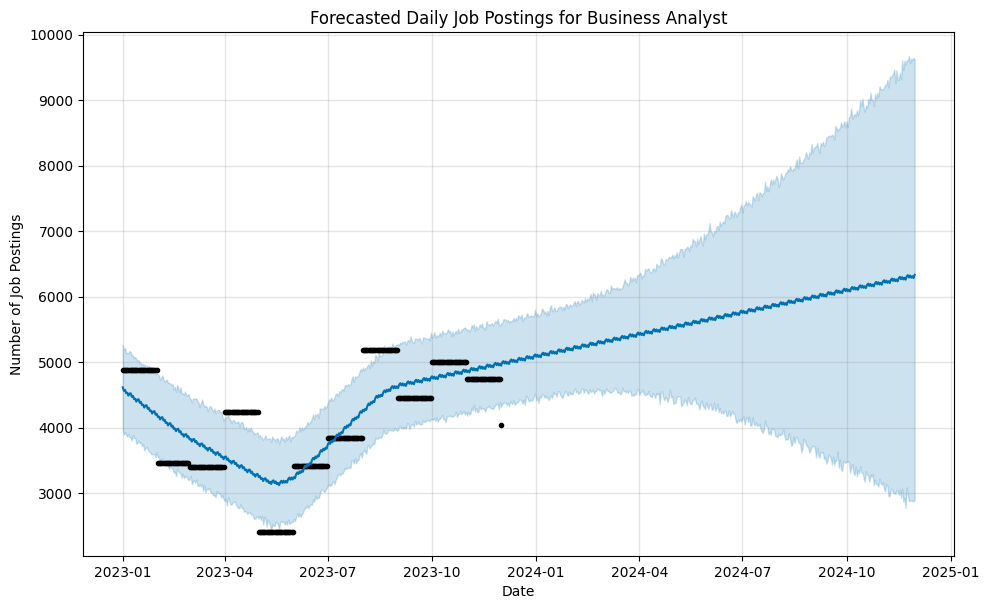

d:\Ironhack\Git\Final project\.venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


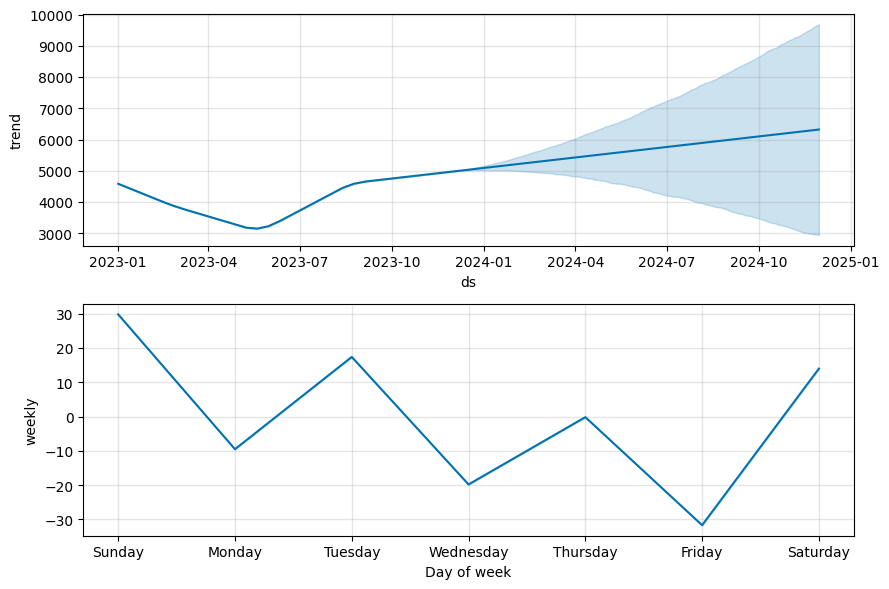

18:40:34 - cmdstanpy - INFO - Chain [1] start processing
18:40:34 - cmdstanpy - INFO - Chain [1] done processing
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 1000x600 with 0 Axes>

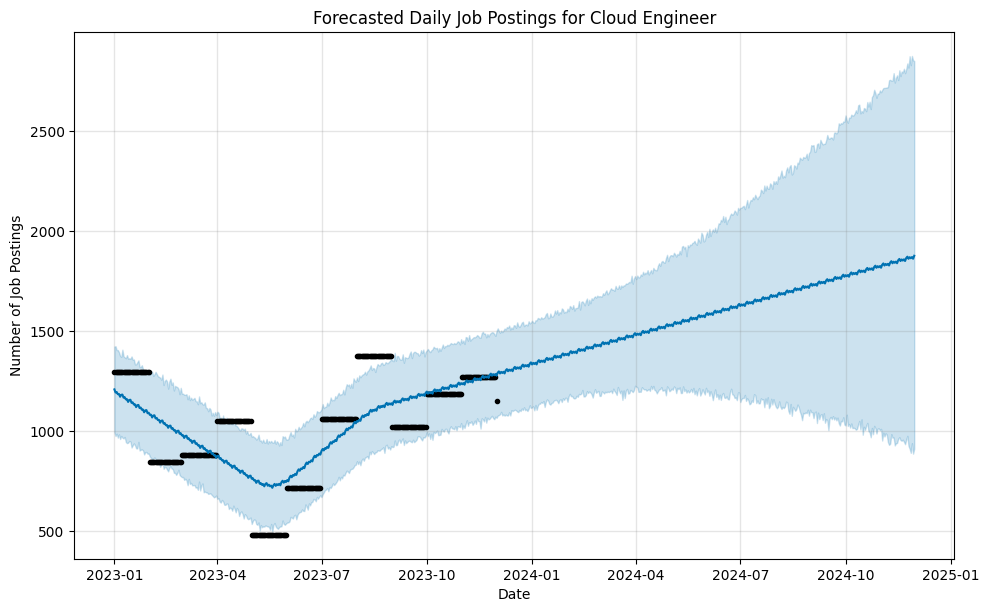

d:\Ironhack\Git\Final project\.venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


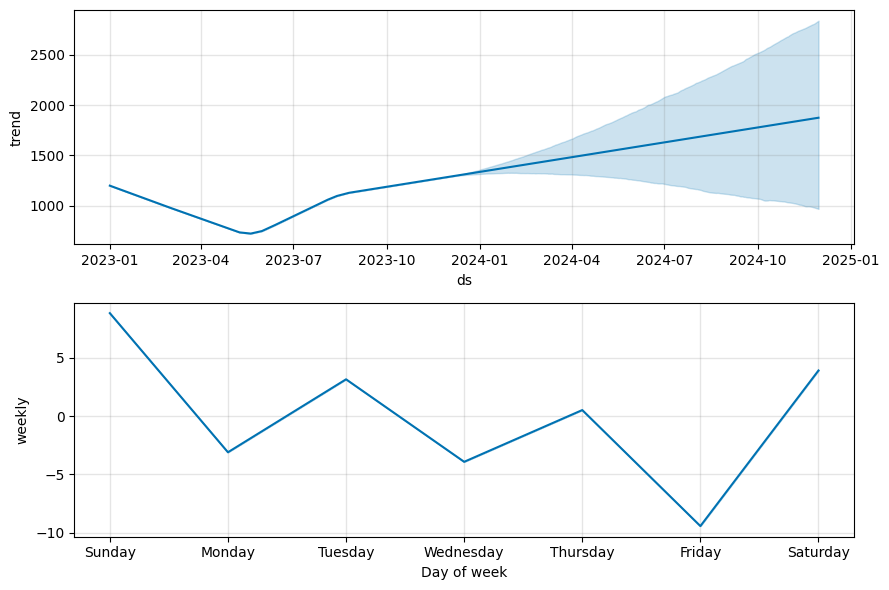

18:40:34 - cmdstanpy - INFO - Chain [1] start processing
18:40:35 - cmdstanpy - INFO - Chain [1] done processing
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 1000x600 with 0 Axes>

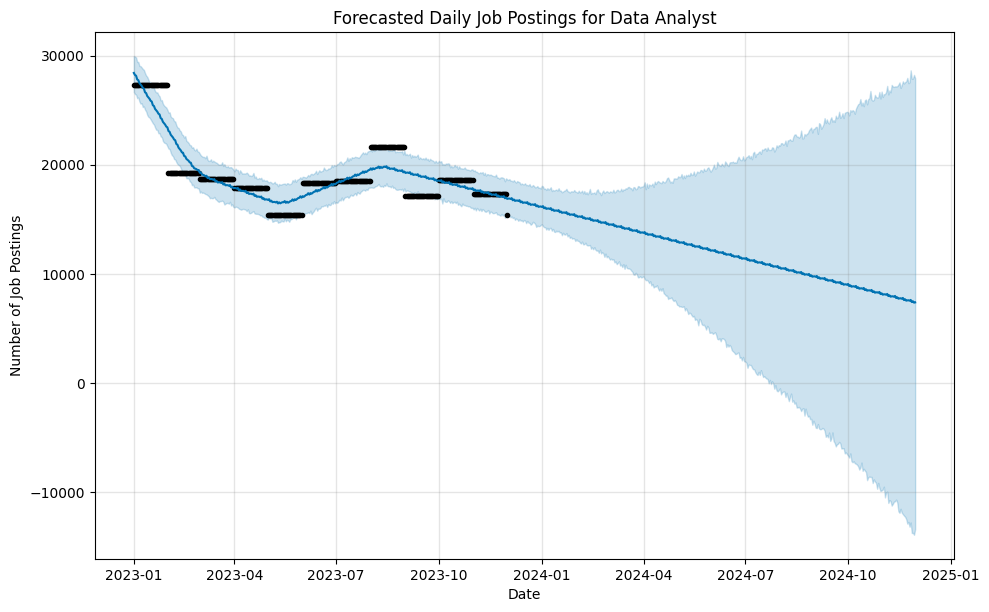

d:\Ironhack\Git\Final project\.venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


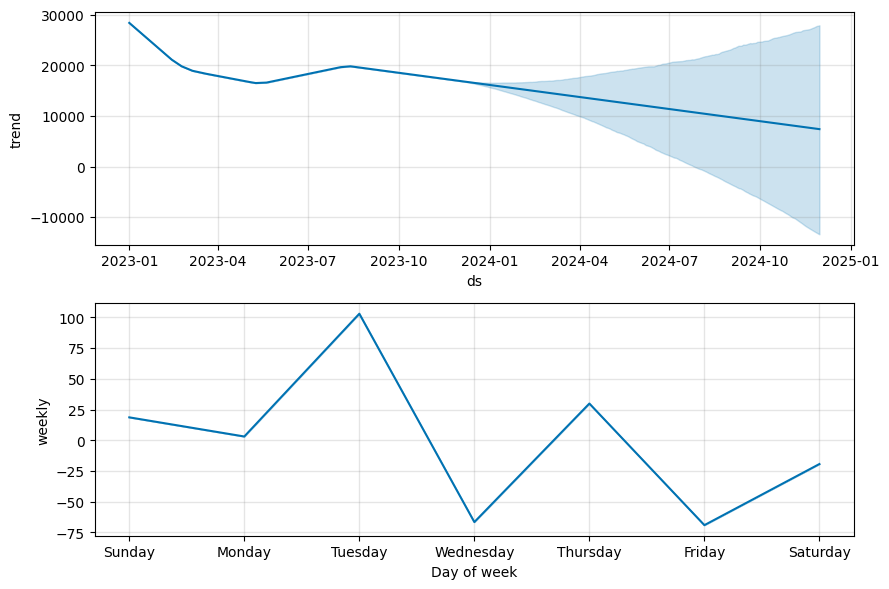

18:40:35 - cmdstanpy - INFO - Chain [1] start processing
18:40:35 - cmdstanpy - INFO - Chain [1] done processing
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 1000x600 with 0 Axes>

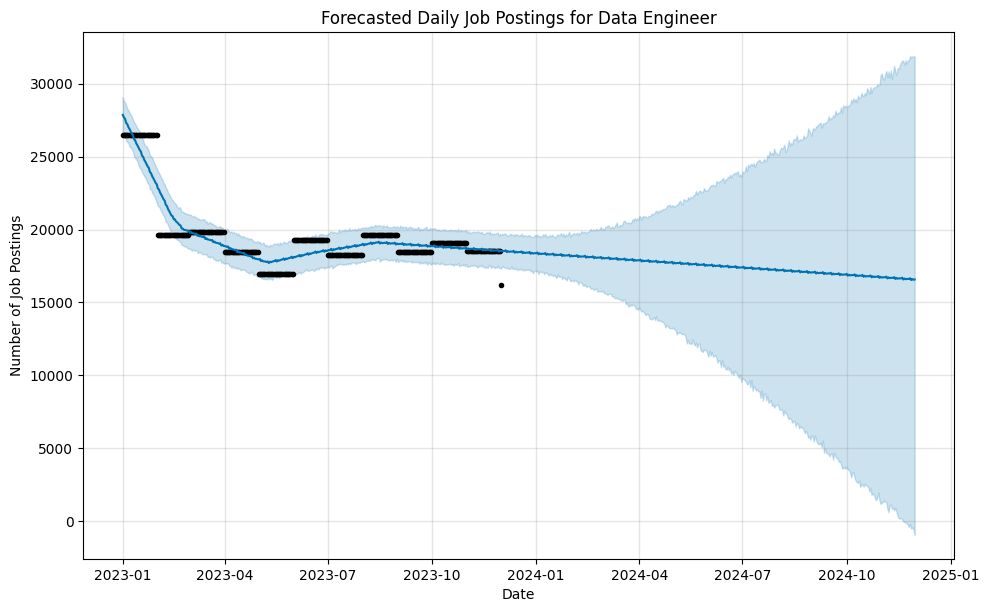

d:\Ironhack\Git\Final project\.venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


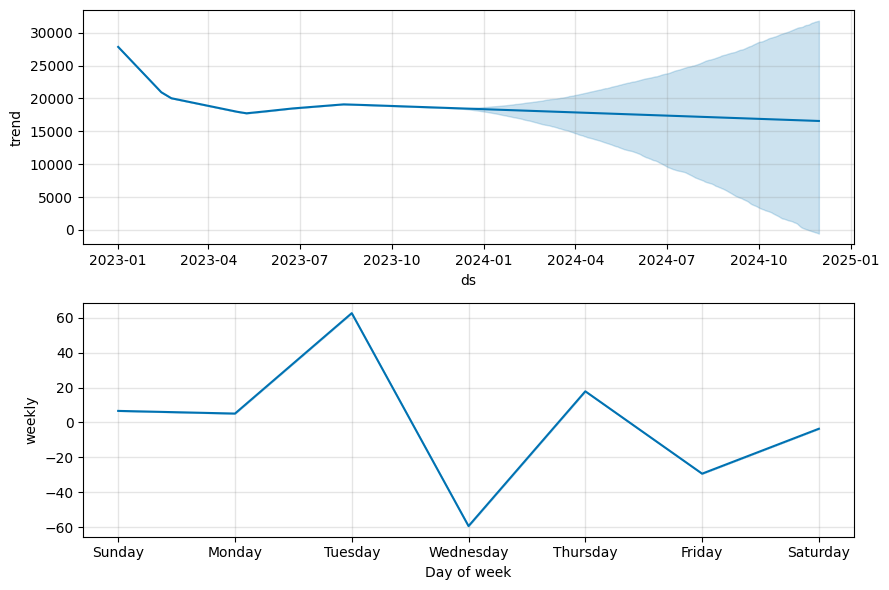

18:40:36 - cmdstanpy - INFO - Chain [1] start processing
18:40:36 - cmdstanpy - INFO - Chain [1] done processing
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 1000x600 with 0 Axes>

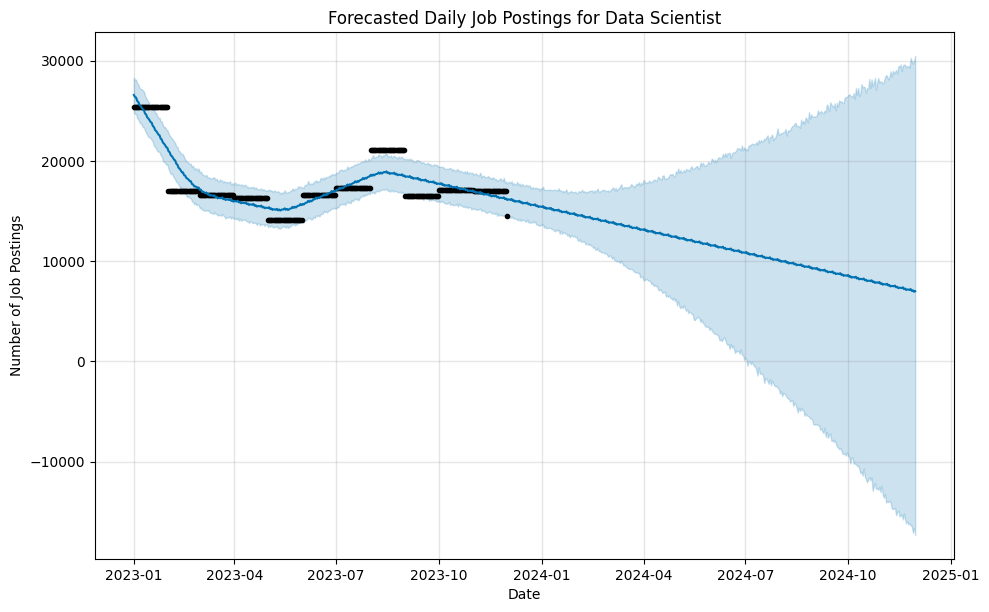

d:\Ironhack\Git\Final project\.venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


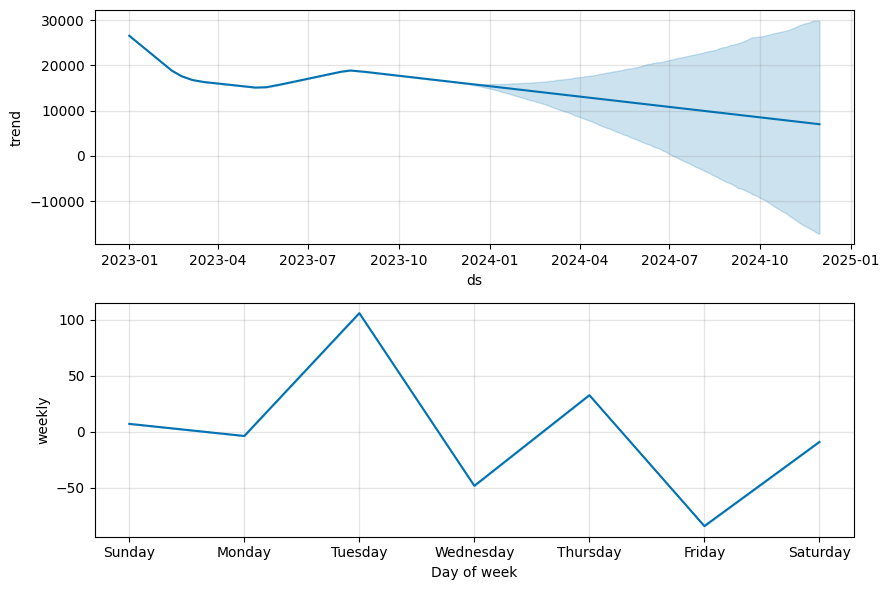

18:40:37 - cmdstanpy - INFO - Chain [1] start processing
18:40:37 - cmdstanpy - INFO - Chain [1] done processing
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 1000x600 with 0 Axes>

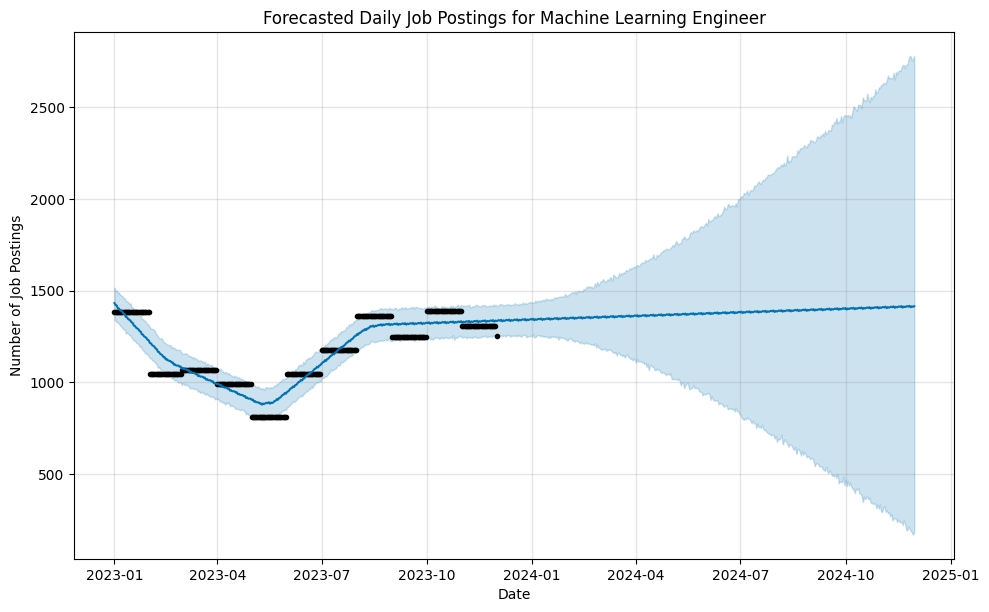

d:\Ironhack\Git\Final project\.venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


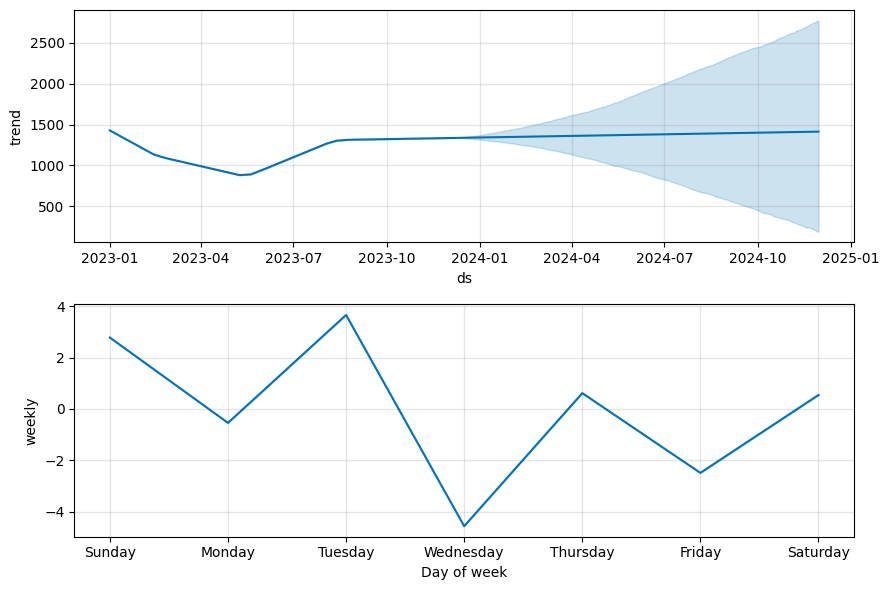

18:40:38 - cmdstanpy - INFO - Chain [1] start processing
18:40:38 - cmdstanpy - INFO - Chain [1] done processing
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
d:\Ironhack\Git\Final project\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 1000x600 with 0 Axes>

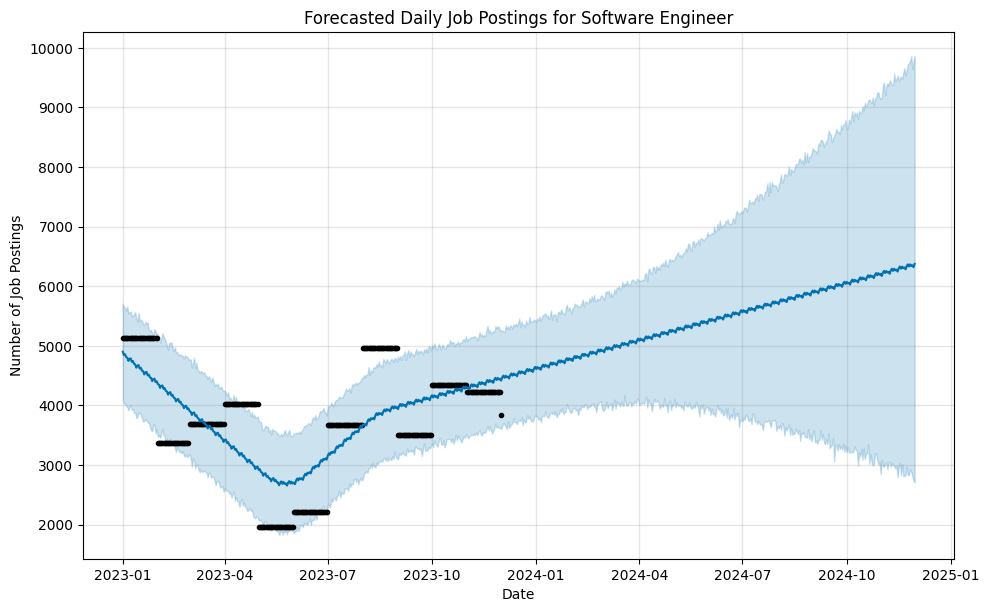

d:\Ironhack\Git\Final project\.venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


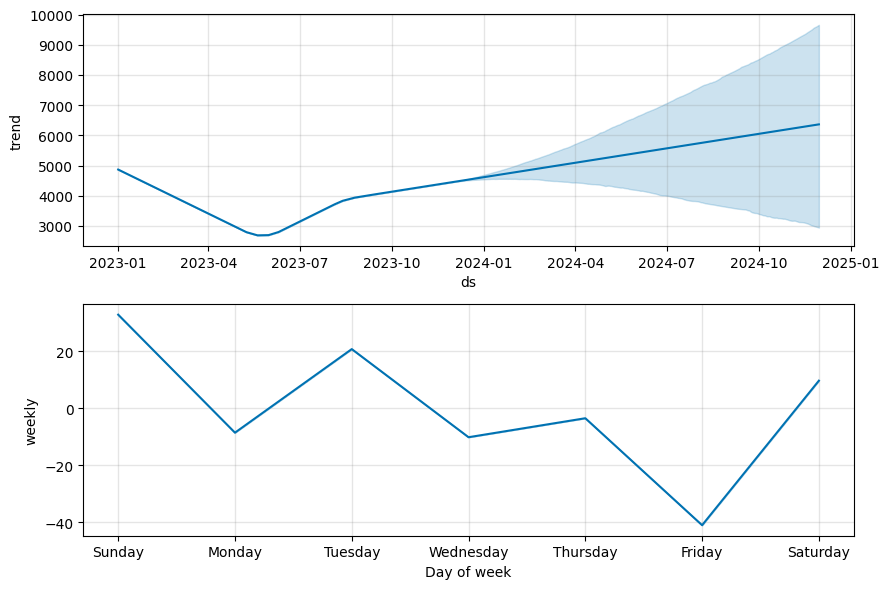

In [23]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the relevant columns
# Aggregate the data by 'job_title_short' and 'ds' (which should be your date column)

# Ensure 'job_posted_date' is in datetime format
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Group the data by month and job title
monthly_totals = df.groupby([df['job_posted_date'].dt.to_period('M'), 'job_title_short']).size().unstack(fill_value=0)

# Convert the Period index back to datetime for consistency
monthly_totals.index = monthly_totals.index.to_timestamp()

# Process each job type separately
forecast_results = {}

for job in monthly_totals.columns:
    # Prepare the data for Prophet
    job_data = monthly_totals[[job]].reset_index()
    job_data.columns = ['ds', 'y']
    
    # Resample to daily frequency, forward-filling the values
    job_data = job_data.set_index('ds').resample('D').ffill().reset_index()
    
    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(job_data)
    
    # Create future dataframe for predictions (e.g., next 365 days)
    future_dates = model.make_future_dataframe(periods=365)
    
    # Forecast future values
    forecast = model.predict(future_dates)
    
    # Store the forecast result
    forecast_results[job] = forecast
    
    # Plot the forecast
    plt.figure(figsize=(10, 6))
    model.plot(forecast)
    plt.title(f'Forecasted Daily Job Postings for {job}')
    plt.xlabel('Date')
    plt.ylabel('Number of Job Postings')
    plt.show()

    # Optional: Plot the components (trend, seasonality)
    model.plot_components(forecast)
    plt.show()
